# Work on timepending variable, using two weeks of data
two weeks: (08/25/23-09/07/23), code reference date: 11/11/23
### Separately created master_finalized_txns_limited.csv 
### from master_finalized_txns.csv.gz (which Tara created)
(status in (confirmed, failed))
### Remove rows where timepending is missing, or timepending = 0
### Generate summary statistics, histogram for timepending


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import datetime
import scipy

import gzip

In [2]:
from pathlib import Path

# Data folder location
#### ADD PATH HERE ####

#read in TWO WEEK, trimmed and finalized, LIMITED mempool data set

limited_df = data_folder/'master_finalized_txns_limited.csv'
df = pd.read_csv(limited_df)


df = df.loc[: , ['basefeepergas', 'maxpriorityfeepergas', 'maxfeepergas', 'timepending']]
df.shape



(10505807, 4)

In [ ]:
#df.head()

In [23]:
#del limited_df
#del df3
#del df2
#del df9
#del df10

In [4]:
df.timepending.describe()

count    1.020627e+07
mean     3.474255e+05
std      5.420721e+07
min      0.000000e+00
25%      5.146000e+03
50%      8.441000e+03
75%      1.132800e+04
max      1.554235e+10
Name: timepending, dtype: float64

## Remove rows where timepending is missing, or where timepending = 0 
### (only zero for private transactions that would not show up in mempool)

In [16]:
del df2
del df3

In [17]:
#Remove rows where timepending is 0, or is Nan
df2 = df.dropna( how = 'all', subset=['timepending'])
df2.shape

df3 = df2[df2.timepending != 0].copy()

#convert to seconds (timepending is in milliseconds)
df3['timepending_'] = df3['timepending']/1000

df3.shape

(10176150, 5)

In [18]:
#find 99th percentile for timepending
#(NOTE: percentile function was not working before with timepending: rows with missing timepending had not been removed)
#np.nanpercentile(df3['timepending'], 99)

x = np.percentile(df3['timepending'], 99)
x

252917.54999999888

In [19]:
#del df10
df10  = df3[df3['timepending']<x]

## Timepending Plot and summary statistics

### Timepending in seconds

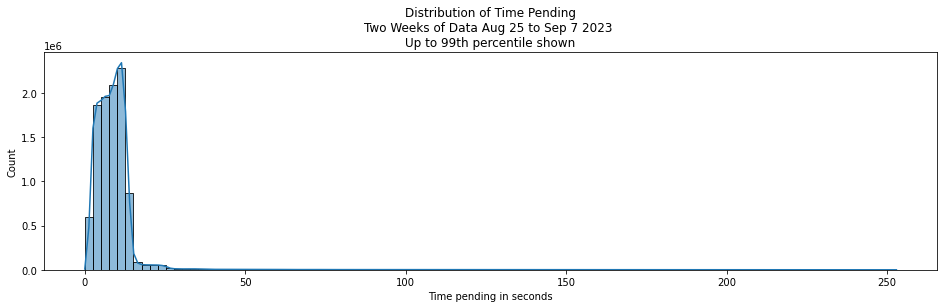

In [20]:
#Plot of timepending that does not include the top 1%
plt.figure(figsize=(16,4))
sns.histplot(df10['timepending_'], bins=100, kde=True, edgecolor = 'black')
plt.title('Distribution of Time Pending\nTwo Weeks of Data Aug 25 to Sep 7 2023 \nUp to 99th percentile shown')
plt.xlabel('Time pending in seconds')
plt.show()

In [13]:
#NOTE: df3 has all finalized rows from the trimmed two week data set 
#          omitting missing values and timepending=0 (appropriate for summary statistics), 
#     d10 excludes the top 1% of timepending values (for the histogram only)
df3['timepending_'].describe()

count    1.017615e+07
mean     3.484537e+05
std      5.428736e+07
min      1.000000e+00
25%      5.176000e+03
50%      8.460000e+03
75%      1.133600e+04
max      1.554235e+10
Name: timepending, dtype: float64

### Timepending in milliseconds

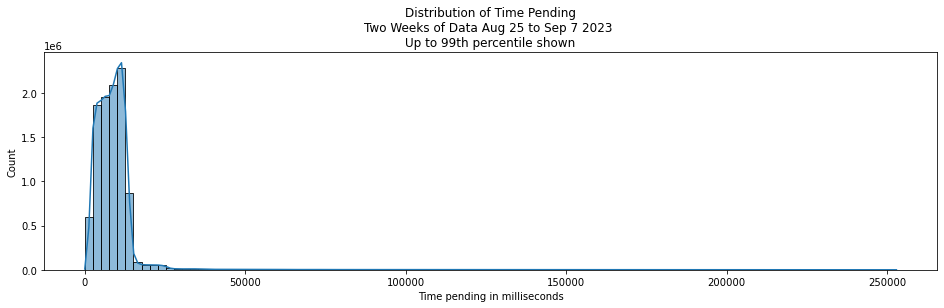

In [21]:
#Plot of timepending that does not include the top 1%
plt.figure(figsize=(16,4))
sns.histplot(df10['timepending'], bins=100, kde=True, edgecolor = 'black')
plt.title('Distribution of Time Pending\nTwo Weeks of Data Aug 25 to Sep 7 2023 \nUp to 99th percentile shown')
plt.xlabel('Time pending in milliseconds')
plt.show()

In [22]:
#NOTE: df3 has all finalized rows from the trimmed two week data set 
#          omitting missing values and timepending=0 (appropriate for summary statistics), 
#     d10 excludes the top 1% of timepending values (for the histogram only)
df3['timepending'].describe()

count    1.017615e+07
mean     3.484537e+05
std      5.428736e+07
min      1.000000e+00
25%      5.176000e+03
50%      8.460000e+03
75%      1.133600e+04
max      1.554235e+10
Name: timepending, dtype: float64